Using the Ham/Spam Text Messaging Corpus for classification

Data can be obtained here: https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

In [1]:
#Imports

#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#For Preprocessing
import nltk
import pandas as pd
import string
from nltk.corpus import stopwords

#For Vectorizing and Weighting
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#For Training
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split

#For Streamlining
from sklearn.pipeline import Pipeline

In [2]:
# Step 1: Importing Data
messages = pd.read_csv('SMSSpamCollection', sep = '\t', names = ["label", "message"]) 
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# Step 2: Exploratory data analysis
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [4]:
messages.groupby('label').describe()

message
label                                                          
ham   count                                                4825
      unique                                               4516
      top                                Sorry, I'll call later
      freq                                                   30
spam  count                                                 747
      unique                                                653
      top     Please call our customer service representativ...
      freq                                                    4

In [5]:
#Create a feature "length" for data visualization
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [6]:
#Gets info about length. Avg is doubled for 'spam'
messages.groupby('label').describe()

length
label                   
ham   count  4825.000000
      mean     71.558964
      std      58.459702
      min       2.000000
      25%      33.000000
      50%      52.000000
      75%      93.000000
      max     910.000000
spam  count   747.000000
      mean    139.119143
      std      28.998900
      min      13.000000
      25%     133.000000
      50%     149.000000
      75%     158.000000
      max     224.000000

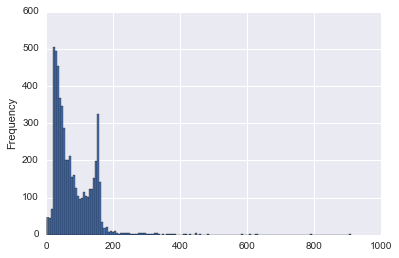

In [7]:
messages['length'].plot.hist(bins=150)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C0FAF60>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000CD80E10>], dtype=object)

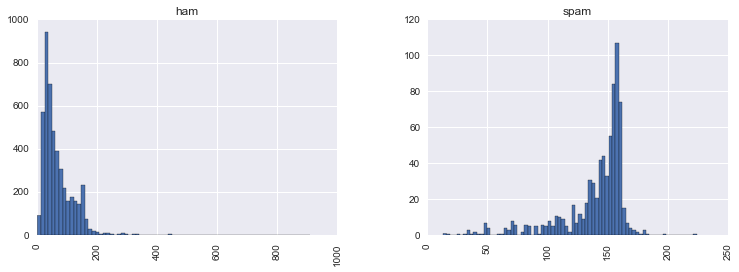

In [8]:
messages.hist(column='length', by='label', bins=75, figsize=(12,4))

In [9]:
# Step 3: Text preprocessing

def text_process(mess):
    """
    Takes in a string and does the following 3 things:
    1. Extracts punctuation
    2. Remove all stopwords
    3. Returns clean text
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english') ]

In [10]:
# Split data

msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size = 0.2)

In [11]:
# Step 4: Vectorize, Weight, and Classify
# All within a pipeline

pipeline = Pipeline([
        ('bow', CountVectorizer(analyzer = text_process)), # strings to token integer counts
        ('tfidf', TfidfTransformer()), # integer counts to weighted TF-IDF scores
        ('classifier', MultinomialNB()), # train on TF-IDF vectors w/ Naive Bayes classifier
    ])

In [12]:
# Magic
pipeline.fit(msg_train, label_train)

C:\Users\GregH\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000000000CC21B38>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproces...         use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [13]:
# Step 5: Predictions
predictions = pipeline.predict(msg_test)
print classification_report(predictions, label_test)

C:\Users\GregH\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


             precision    recall  f1-score   support

        ham       1.00      0.96      0.98      1016
       spam       0.71      1.00      0.83        99

avg / total       0.97      0.96      0.97      1115



Around 97% accuracy

End